In [1]:
import cv2
import matplotlib.pyplot as plt
import time
import os
from IPython.display import clear_output
import datetime
from MapleKit.Utils.location import locateOnPicture, locateCenterOnPicture, pixelMatchesColor
import pytesseract

WORKPATH = "C:/Users/Johan/Documents/PycharmProjects/MaplestoryM-Assistant"
desired_window = "BlueStacks App Player"
adb_port = 11902
os.chdir(WORKPATH)

In [3]:
print(os.popen('adb devices').read())
connect = os.popen("adb connect 127.0.0.1:" + str(adb_port)).read()
print(connect)

List of devices attached
127.0.0.1:11902	device


already connected to 127.0.0.1:11902



In [31]:
os.system('adb shell screencap -p /sdcard/screenshot.png')
os.system('adb pull /sdcard/screenshot.png ./screenshot.png')
im = cv2.imread('./screenshot.png')

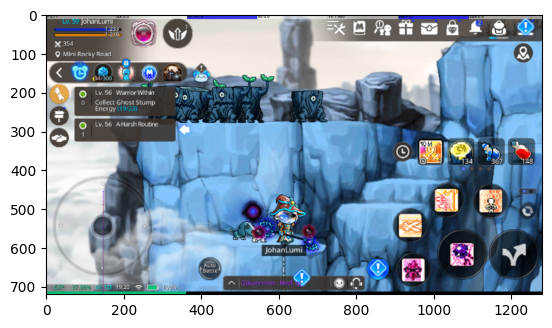

In [32]:
plt.imshow(im)

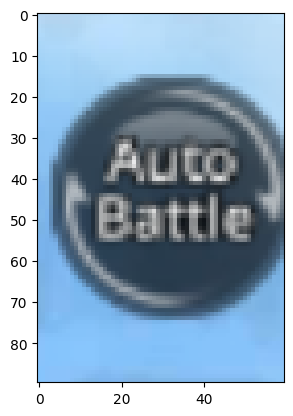

In [33]:
plt.imshow(im[610:700, 390:450])

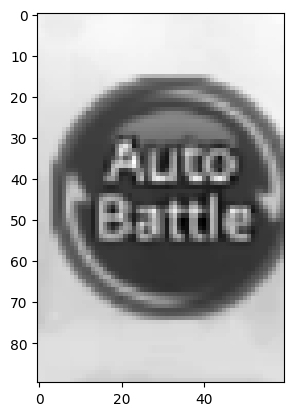

In [42]:
im_grey = cv2.cvtColor(im[610:700, 390:450], cv2.COLOR_BGR2GRAY)
plt.imshow(im_grey, cmap='gray')

In [36]:
pytesseract.image_to_string(im_grey)

''

In [17]:
accept_button_pic = cv2.imread("./raw_data/US/Buttons/Accept_Button.png")
claim_button_pic = cv2.imread("./raw_data/US/Buttons/ClaimReward_Button.png")
complete_button_pic = cv2.imread("./raw_data/US/Buttons/Complete_Button.png")
confirm_button_pic = cv2.imread("./raw_data/US/Buttons/Confirm_Button.png")
autoplay_button_pic = cv2.imread("./raw_data/US/Buttons/AutoPlay.png")
go_manully_button_pic = cv2.imread("./raw_data/US/Buttons/GoManully.png")
autoassign_button_pic = cv2.imread("./raw_data/US/Buttons/AutoAssign_Button.png")
equip_button_pic = cv2.imread("./raw_data/US/Buttons/Equip-Button.png")
Available2Start_ComplexButton_pic = cv2.imread("./raw_data/US/Buttons/Available2Start-ComplexButton.png")
Complete_ComplexButton_pic = cv2.imread("./raw_data/US/Buttons/Complete-ComplexButton.png")
CloseMail_Button_pic = cv2.imread("./raw_data/US/Buttons/CloseMail-Button.png")
c = 0.5

run_count = 0
while True:
    clear_output(wait=True)
    run_count += 1
    print(f"Current round count:{run_count}")
    if run_count%500==0:
        os.system("adb shell kill-server")
        os.system("adb shell start-server")
        os.popen("adb connect 127.0.0.1:" + str(adb_port))
    print(datetime.datetime.now())
    s = time.time()
    try:
        print("ForegroundWindow not BlueStacks, adb screencap is using.")
        os.system('adb shell screencap -p /sdcard/screenshot.png')
        os.system('adb pull /sdcard/screenshot.png ./screenshot.png')
        im = cv2.imread('./screenshot.png')
        os.system('adb shell rm /sdcard/screenshot.png')
        os.remove('./screenshot.png')
    except:
        print("Restart adb service")
        os.system("adb shell kill-server")
        os.system("adb shell start-server")
        os.popen("adb connect 127.0.0.1:" + str(adb_port))
        continue
    print("Begin Perturbation!")
    if locateOnPicture(autoassign_button_pic, im, confidence = 0.8):
        print("Auto Assign")
        retVal = locateCenterOnPicture(autoassign_button_pic, im, confidence = 0.8)
        os.system("adb shell input tap " + str(retVal[0]) + " " + str(retVal[1]))
        time.sleep(1)
    elif locateOnPicture(equip_button_pic, im, confidence = 0.8):
        print("Auto Equip")
        retVal = locateCenterOnPicture(equip_button_pic, im, confidence = 0.8)
        os.system("adb shell input tap " + str(retVal[0]) + " " + str(retVal[1]))
        time.sleep(1)
    elif locateOnPicture(CloseMail_Button_pic, im, confidence=0.95):
        print("Close All Mail")
        retVal = locateCenterOnPicture(CloseMail_Button_pic, im, confidence=0.95)
        os.system("adb shell input tap " + str(retVal[0]) + " " + str(retVal[1]))
        time.sleep(1)
    elif locateOnPicture(accept_button_pic, im, confidence = c):
        print("Accept")
        retVal = locateCenterOnPicture(accept_button_pic, im, confidence = c)
        os.system("adb shell input tap " + str(retVal[0]) + " " + str(retVal[1]))
        time.sleep(2)
    elif locateOnPicture(claim_button_pic, im, confidence = c):
        print("claim")
        retVal = locateCenterOnPicture(claim_button_pic, im, confidence = c)
        os.system("adb shell input tap " + str(retVal[0]) + " " + str(retVal[1]))
        time.sleep(2)
    elif locateOnPicture(confirm_button_pic, im, confidence = c):
        print("confirm")
        retVal = locateCenterOnPicture(confirm_button_pic, im, confidence = c)
        os.system("adb shell input tap " + str(retVal[0]) + " " + str(retVal[1]))
        time.sleep(2)
    elif locateOnPicture(complete_button_pic, im, confidence = c):
        print("complete")
        retVal = locateCenterOnPicture(complete_button_pic, im, confidence = c)
        os.system("adb shell input tap " + str(retVal[0]) + " " + str(retVal[1]))
        time.sleep(2)
    elif locateOnPicture(Complete_ComplexButton_pic, im, confidence = c):
        print("Complex Choice: Complete")
        retVal = locateCenterOnPicture(Complete_ComplexButton_pic, im, confidence = c)
        os.system("adb shell input tap " + str(retVal[0]) + " " + str(retVal[1]))
        time.sleep(2)
    elif locateOnPicture(Available2Start_ComplexButton_pic, im, confidence = 0.8):
        print("Complex Choice: Accept")
        retVal = locateCenterOnPicture(Available2Start_ComplexButton_pic, im, confidence = c)
        os.system("adb shell input tap " + str(retVal[0]) + " " + str(retVal[1]))
        time.sleep(2)
    elif locateOnPicture(go_manully_button_pic, im, confidence = 0.8):
        print("In Autoplay Status")
        time.sleep(5)
    elif locateOnPicture(autoplay_button_pic, im, confidence = 0.8):
        print("AutoPlay Stopped, Tap to Continue!")
        retVal = locateCenterOnPicture(autoplay_button_pic, im, confidence = 0.8)
        print(retVal)
        os.system("adb shell input tap " + str(retVal[0]) + " " + str(retVal[1]))
        time.sleep(10)
    elif pixelMatchesColor(cv2.cvtColor(im,cv2.COLOR_BGR2RGB)[203, 95], (6, 171, 96), tolerance=20):
        print("Start Quest")
        os.system("adb shell input tap 200 200")
        time.sleep(2)
    elif pixelMatchesColor(cv2.cvtColor(im,cv2.COLOR_BGR2RGB)[40, 110], (210, 195, 140), tolerance=20):
        print("Skip")
        os.system("adb shell input tap 284 402")
        time.sleep(2)
    else:
        os.system("adb shell input tap 1161 481")
        plt.imshow(im)
        print("Talking or Nothing to Do")
        time.sleep(1)

Current round count:1
2022-10-22 21:28:55.370931
ForegroundWindow not BlueStacks, adb screencap is using.
Begin Perturbation!



KeyboardInterrupt

